C:\Users\tobyj\PycharmProjects\FYP\pathvision\venv3.9\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tobyj\PycharmProjects\FYP\pathvision\venv3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\tobyj\PycharmProjects\FYP\pathvision\venv3.9\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to pass

loading annotations into memory...


2023-04-11 16:54:37,648 -  INFO - Processing frame 1 of 2 frames


Done (t=0.79s)
creating index...
index created!


2023-04-11 16:54:41,992 -  INFO - Loading gradients from disk


CLASS INDEX


C:\Users\tobyj\PycharmProjects\FYP\pathvision\venv3.9\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(999, 1500, 3)
(999, 1500, 4)


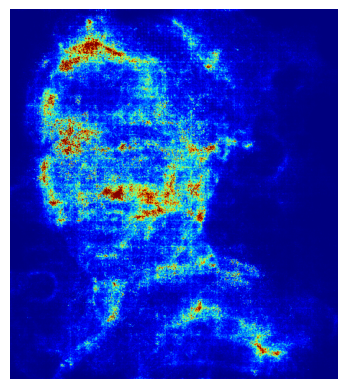

In [1]:
from PIL import Image
import pathvision.core as pathvision
from matplotlib import pylab as P
import torch
import os
from PIL import Image

import numpy as np


def ShowImage(im, title='', ax=None):
    if ax is None:
        fig, ax = P.subplots()
    if isinstance(im, Image.Image):  # check if image is PIL image
        im = np.asarray(im)
    ax.imshow(im.squeeze())
    ax.set_title(title)
    ax.axis('off')
    return ax
im = np.load("pathvision/test/outs/smoothgrad/heatmap/heatmap_image0.npy")
ShowImage(im=im)
frames = []

frames.append(Image.open("pathvision/test/frame2.jpg"))
# frames.append(Image.open("pathvision/test/frame.png"))
od = pathvision.ObjectDetection()
image = od.ProcessFrames(frames=frames, labels="COCO", gradient_technique="Smoothgrad",
                                         trajectory_technique="KalmanFilter", segmentation_technique="Panoptic Deeplab",
                                         pre_trained_model="fasterrcnn_resnet50_fpn", model=None, threshold=None, LoadFromDisk=True, log=True)

<PIL.Image.Image image mode=RGBA size=1500x999 at 0x29FD8B00D60>


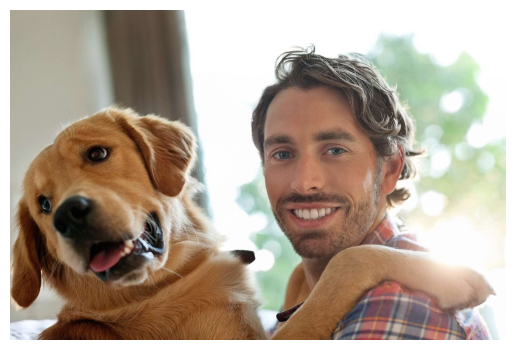

In [5]:
ShowImage(image)
print(image)

In [7]:
from matplotlib import pyplot as plt

heat = image[0]
heatmap = plt.get_cmap('jet')(heat)

heatmap_rgb = (np.delete(heatmap, 3, 2) * 255).astype(np.uint8)

heatmap = heatmap[:, :, :3]
plt.imshow(heatmap)
plt.show()

IndexError: index 3 is out of bounds for axis 2 with size 3